# <font color=#0000FF>套件</font>

In [37]:
import pandas as pd
from datetime import datetime

# <font color=#0000FF>讀檔</font>

In [58]:
df_OWM = pd.read_csv(f'OpenWeatherMap.3H/Save/OWM.3H.Merge.Multiple(merge).csv')
df_CWB = pd.read_csv(f'CWB.3H/Save/CWB.3H.Merge.Multiple.csv')
df_Observation_CWB = pd.read_csv(f'Observation_CWB/467490.csv')
df_Observation_CWB_date = df_Observation_CWB["date"]
start_df_Observation_CWB = df_Observation_CWB_date.iloc[1]#date欄第一筆日期值
end_df_Observation_CWB = df_Observation_CWB_date.iloc[-1]#date欄最後一筆日期值
df_CWB = df_CWB.sort_values(by="TIME_TO_INTERVAL",ascending=True)#排序

# <font color=#0000FF>資料合併起始時間</font>

In [59]:
#篩選OWM和CWB的TIME_TO_INTERVAL欄位日期大於等於2021/04/01'
starttime = '2021-04-01 00:00:00'
df_OWM_day = df_OWM["TIME_TO_INTERVAL"] >= starttime
df_CWB_day = df_CWB["TIME_TO_INTERVAL"] >= starttime
df_OWM = df_OWM[df_OWM_day]
df_CWB = df_CWB[df_CWB_day]
df_CWB

,CityName,LocationName,geocode,Latitude,Longitude,WeatherType,WeatherType(index),ApparentTemperature(pred),Temperature(pred),RelativeHumidity(pred),...,PoP6h(pred),WindSpeed(pred),WindSpeed(index),WindDirection(pred),DewpointTemperature(pred),TIME_TO_INTERVAL,CrawlerTime,TimeAhead,Location,Hour
52094,彰化縣,彰化市,1000701,24.082575,120.534059,多雲,4,26,23,88,...,0.0,3,2,東南風,21.0,2021-04-01 06:00:00,2021-03-31 23:03:34,3,彰化市彰化縣,6.0
88774,彰化縣,彰化市,1000701,24.082575,120.534059,多雲,4,26,23,88,...,0.0,3,2,東南風,21.0,2021-04-01 06:00:00,2021-03-31 23:03:34,0,彰化市彰化縣,6.0
15436,彰化縣,彰化市,1000701,24.082575,120.534059,多雲,4,26,23,88,...,0.0,3,2,東南風,21.0,2021-04-01 06:00:00,2021-03-31 23:03:34,24,彰化市彰化縣,6.0
52095,彰化縣,彰化市,1000701,24.082575,120.534059,晴,1,27,26,75,...,0.0,4,3,西南風,21.0,2021-04-01 09:00:00,2021-03-31 23:03:34,3,彰化市彰化縣,9.0
15437,彰化縣,彰化市,1000701,24.082575,120.534059,晴,1,27,26,75,...,0.0,4,3,西南風,21.0,2021-04-01 09:00:00,2021-03-31 23:03:34,24,彰化市彰化縣,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32805,彰化縣,芬園鄉,10007090,24.015384,120.620811,多雲,4,17,17,81,...,0.0,2,<= 1,西北風,13.0,2023-01-21 09:00:00,2023-01-20 01:00:00,24,NaN,NaN
31521,彰化縣,線西鄉,10007040,24.132324,120.462580,多雲,4,16,17,80,...,0.0,4,3,偏北風,13.0,2023-01-21 09:00:00,2023-01-20 01:00:00,24,NaN,NaN
30237,彰化縣,竹塘鄉,10007250,23.862199,120.419721,多雲,4,17,17,82,...,0.0,2,2,西北風,14.0,2023-01-21 09:00:00,2023-01-20 01:00:00,24,NaN,NaN
55339,彰化縣,彰化市,10007010,24.082575,120.534059,多雲,4,17,17,72,...,0.0,3,2,西北風,12.0,2023-01-21 09:00:00,2023-01-20 01:00:00,3,NaN,NaN


# <font color=#0000FF>資料處理</font>

In [61]:
#抓取WeatherType欄
# df_OWM_weathertype =  df_OWM[5]
# df_CWB_weathertype =  df_CWB[5]
#抓取csv的資料長度
df_OWM_len = len(df_OWM)
df_CWB_len = len(df_CWB)
df_Observation_CWB = len(df_Observation_CWB)

# <font color=#0000FF>取得日期區間</font>

In [66]:
format = '%Y/%m/%d' 
start_datatime = datetime.strptime(start_df_Observation_CWB,format)
format = '%Y-%m-%d'
end_datatime = datetime.strptime(end_df_Observation_CWB,format)
delta = end_datatime - start_datatime #取得日期區間
deltadays = delta.days#從days轉int
# start_datatime = pd.date_range(start='2021/10/11', periods=12, freq='15min')
# end_datatime


# <font color=#0000FF>擴增資料並存回csv</font>

In [67]:
#需建立資料的筆數
allperiods = (int(deltadays)*24*4)+(24*4)+1#(日期區間*一天24小時*4一小時可切４等份１５分鐘)+一天份的15分鐘
start_datatime = pd.date_range(start=starttime, periods=allperiods, freq='15min')
start_datatime = start_datatime.strftime("%Y/%m/%d %H:%M")
#將產生的每15分鐘資料存到csv檔
start_datatime_csv = {"TIME_TO_INTERVAL":start_datatime,
                      "WeatherType(CWB)":'',
                      "WeatherType(pred)(CWB)":'',
                      "WeatherType(OWM)":'',
                      "WeatherType(pred)(OWM)":'',
                      "ApparentTemperature(pred)[CWB]":'',
                      "Temperature(pred)[CWB]":'',
                      "RelativeHumidity(pred)[CWB]":'',
                      "FeelsLikeTemperature(pred)[OWM]":'',
                      "Temperature(pred)[OWM]":'',
                      "RelativeHumidity(pred)[OWM]":''
                     }
start_datatime_csv = pd.DataFrame(data=start_datatime_csv)
start_datatime_csv.to_csv(f'dataset/merge_large_tables_15.csv',index=None)

In [20]:
#讀取df_merge_large_tables_15
df_merge_large_tables_15 = pd.read_csv(f'dataset/merge_large_tables_15.csv', header=None)
#取得df_merge_large_tables_15長度
merge_large_tables_15_len = len(df_merge_large_tables_15)

In [7]:
for j in range(1,merge_large_tables_15_len):
    #每隔15分鐘產生一個時間，共產生12個
    df_datatime = pd.date_range(start=time_all[j], periods=12, freq='15min')
    #print(time_all[j]) 
    #Temperature(pred)處理值  
    if j == dfXlen-1:#如果程式執行到最後一筆資料,此時最後一筆資料沒有下一筆資料可比較跳出迴圈
        break
    else:
        firsttemperature = float(numpydf_X[j,6])#第j筆temperature
        previoustemperature = float(numpydf_X[j+1,6])#第j筆的下一筆temperature


        if firsttemperature:
            if firsttemperature < previoustemperature:
                    temperature = np.linspace(previoustemperature,firsttemperature,13) #下一筆值比該筆大,存13筆(15m第13筆值會與3h值一樣)
                    temperature.sort()#由小到大
                    temperature = temperature.tolist()
                    temperature.remove(previoustemperature)#刪除15m的13筆的第13筆,才能線性產生值
                    temperature = np.round(temperature,2)#取到小數點後兩位
            elif firsttemperature > previoustemperature:
                    temperature = np.linspace(firsttemperature,previoustemperature,13)# 下一筆值比該筆小
                    temperature = abs(np.sort(-temperature))#由大到小
                    temperature = temperature.tolist()
                    temperature.remove(previoustemperature)
                    temperature = np.round(temperature,2)#取到小數點後兩位
            elif firsttemperature == previoustemperature:#如果該筆的值和下一筆一樣則存一樣的值
                temperature = np.full(12,firsttemperature)#存12筆    
        #第j行
        df_X_original =df_X.loc[j,:]

        for i in range(0,12):
            #第一個replace將舊的替換成新的 ex:2020-06-01 20:00:00 -> 2020-06-01 20:15:00
            #第二個replace將舊的Temperature(pred)替換成新的Temperature(pred)
            df_X_new = df_X_original.replace(str(df_datatime[0]), str(df_datatime[i])).replace(df_Temperature[j], temperature[i])
            if i==1 and j ==1:
                #to_frame().T為轉置
                df_X1 = pd.concat([df_X1,df_X_new.to_frame().T],axis=0, ignore_index=True)
            else:
                df_X1 = pd.concat([df_X1,df_X_new.to_frame().T],axis=0, ignore_index=True)
            
df_X1

linear
[ 0.          0.          0.          0.          0.          0.
  0.84147098  0.84147098  0.84147098  0.84147098  0.84147098  0.84147098
  0.84147098  0.84147098  0.84147098  0.84147098  0.90929743  0.90929743
  0.90929743  0.90929743  0.90929743  0.90929743  0.90929743  0.90929743
  0.90929743  0.90929743  0.14112001  0.14112001  0.14112001  0.14112001
  0.14112001  0.14112001  0.14112001  0.14112001  0.14112001  0.14112001
 -0.7568025  -0.7568025  -0.7568025  -0.7568025  -0.7568025  -0.7568025
 -0.7568025  -0.7568025  -0.7568025  -0.7568025  -0.95892427 -0.95892427
 -0.95892427 -0.95892427 -0.95892427 -0.95892427 -0.95892427 -0.95892427
 -0.95892427 -0.95892427 -0.2794155  -0.2794155  -0.2794155  -0.2794155
 -0.2794155  -0.2794155  -0.2794155  -0.2794155  -0.2794155  -0.2794155
  0.6569866   0.6569866   0.6569866   0.6569866   0.6569866   0.6569866
  0.6569866   0.6569866   0.6569866   0.6569866   0.98935825  0.98935825
  0.98935825  0.98935825  0.98935825  0.98935825  0.9893

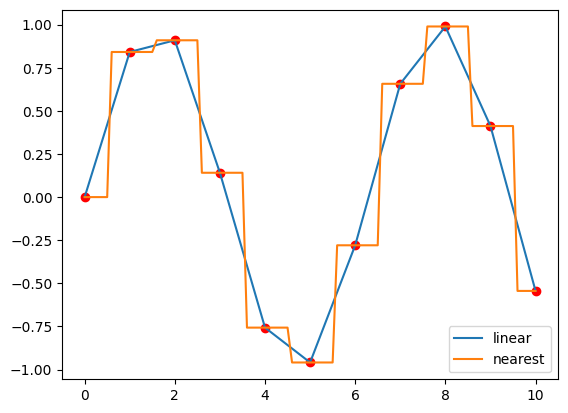

In [14]:
import numpy as np
from scipy import interpolate
import pylab as pl

x=np.linspace(0,10,11)
y=np.sin(x)

xnew=np.linspace(0,10,101)

pl.plot(x,y,'ro')
list1=['linear','nearest']
list2=[0,1,2,3]
for kind in list1:
    print(kind)
    f=interpolate.interp1d(x,y,kind=kind)
    print(ynew)
    #f是一个函数，用这个函数就可以找插值点的函数值了：
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=kind)

pl.legend(loc='lower right')
pl.show()